# Algorithm benchmarking


In [1]:
from pydistsim.logging import enable_logger
from pydistsim.benchmark import AlgorithmBenchmark
from pydistsim.demo_algorithms.broadcast import Flood
from pydistsim.network.behavior import NetworkBehaviorModel

In [2]:
enable_logger()

### Set-up the benchmark

- Pass algorithm, network sizes to test and the network behavior.
- Then run the benchmark.


In [3]:
benchmark = AlgorithmBenchmark(
    ((Flood, {"initial_information": "Hello Wold!"}),),
    network_sizes=range(1, 20),  # equivalent to [1, 2, 3, ..., 19]
    network_behavior=NetworkBehaviorModel.UnorderedRandomDelayCommunication,  # You can define their own network behavior, check behavior vizualization notebook
)

benchmark.run()

### Automatically generated plots with the results


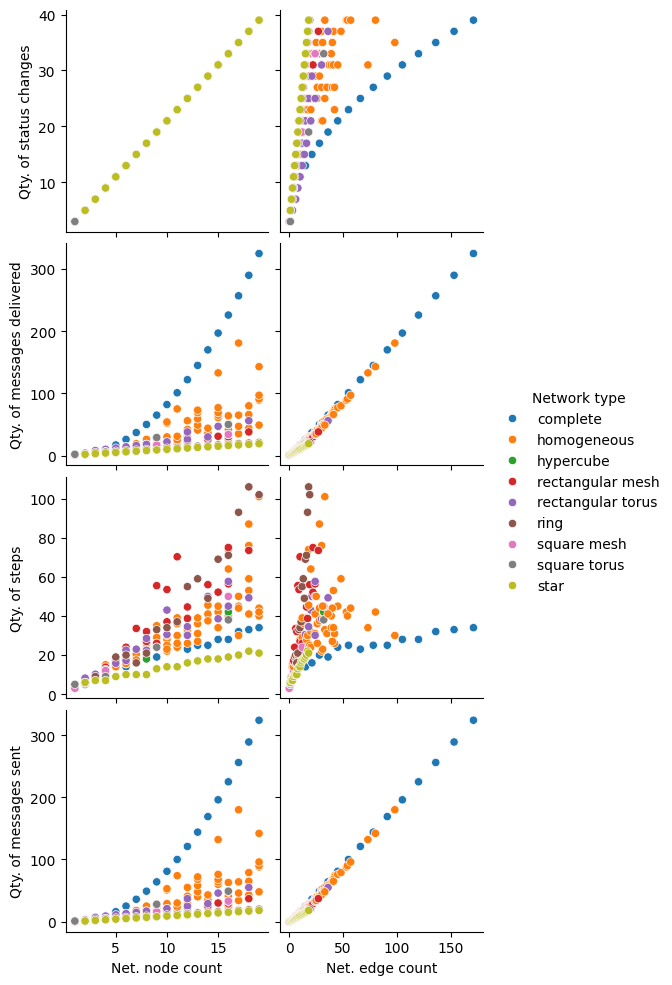

In [4]:
benchmark.plot_analysis()  # Create a plot

Filter the results by network type and only show specific graphs:

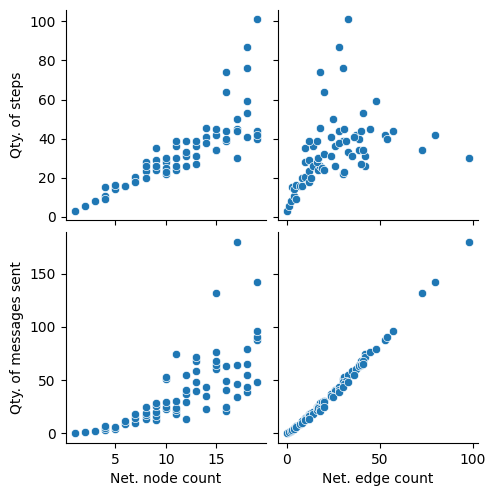

In [7]:
benchmark.plot_analysis(
    y_vars=["Qty. of messages sent", "Qty. of steps"],
    result_filter=lambda result: result["Network type"] == "homogeneous",
)

### Get the data as a pandas DataFrame for in-depth analysis


In [5]:
df = benchmark.get_results_dataframe()  # Get the results as a pandas DataFrame

df  # This will display the results as a table

,Net. node count,Net. edge count,Network type,Qty. of messages sent,Qty. of messages delivered,Qty. of status changes,Qty. of steps
0,1,0,complete,0,1,3,3
1,1,0,hypercube,0,1,3,3
2,1,0,ring,0,1,3,3
3,1,0,square mesh,0,1,3,3
4,1,1,square torus,1,2,3,5
...,...,...,...,...,...,...,...
349,16,24,rectangular mesh,33,34,33,55
350,18,36,rectangular torus,55,56,37,56
351,19,33,homogeneous,48,49,39,101
352,15,22,rectangular mesh,30,31,31,41
